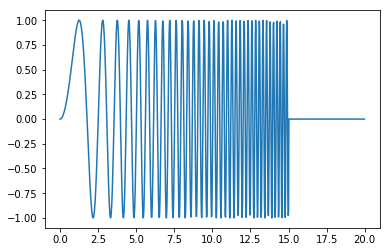

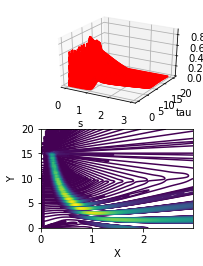

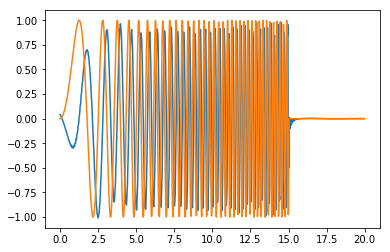

In [22]:
# Transform  sin(t*t) and the signal given in the beginning (use Morlet wavelet)

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=1000
dtstep=20./nt
tar=arange(0.,20.,dtstep)

def func(t):
    return func2(t)

def func2(t): #chirp signal
    y=0.
    if(0<=t and t<=15):
        y=sin(t*t)
    return y

# sin(2 \pi t) Didn't use this one
def func1(t): 
    return(sin(2.*pi*t))

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

# reconstruct the origional signal

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.imag)
p.plot(tar,yarr)
p.show()